In [1]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()

    series_labels = pd.DataFrame(list_labels)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels.head()
print df_labels.tail()

      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [2]:

def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps)

    return df_pumps

df_data = load_wells()

df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [3]:
df_labels = load_labels()

df_labels.columns = ['id','label']

print df_labels.head()
print df_labels.tail()

      id           label
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
          id       label
59395  60739  functional
59396  27263  functional
59397  37057  functional
59398  31282  functional
59399  26348  functional


In [4]:
df_labels = df_labels.sort(['id'])

print df_labels.head()
print df_labels.tail()

       id           label
9410    0  non functional
18428   1      functional
12119   2      functional
10629   3      functional
2343    4  non functional
          id           label
15137  74240      functional
8667   74242      functional
22584  74243  non functional
108    74246  non functional
39131  74247  non functional


In [5]:
df_data = load_wells()

df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']





In [6]:
print df_data.head()

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...          payment_type water_quality quality_group  \
0          ...              annually          soft          good   
1          ...             n

In [6]:
a = df_data.basin.unique()
df_data.basin.replace(a,(1,2,3,4,5,6,7,8,9),inplace=True)

b = df_data.scheme_management.unique()
df_data.scheme_management.replace(b,range(len(b)),inplace=True)

c = df_data.extraction_type_class.unique()
df_data.extraction_type_class.replace(c,range(len(c)),inplace=True)

d = df_data.management_group.unique()
df_data.management_group.replace(d,range(len(d)),inplace=True)

e = df_data.payment.unique()
df_data.payment.replace(e,range(len(e)),inplace=True)

f = df_data.water_quality.unique()
df_data.water_quality.replace(f,range(len(f)),inplace=True)

g = df_data.quantity.unique()
df_data.quantity.replace(g,range(len(g)),inplace=True)

h = df_data.source.unique()
df_data.source.replace(h,range(len(h)),inplace=True)

i = df_data.source_class.unique()
df_data.source_class.replace(i,range(len(i)),inplace=True)

j = df_data.waterpoint_type.unique()
df_data.waterpoint_type.replace(j,range(len(j)),inplace=True)

print df_data.head()
print df_data.tail()


      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572        6000    2011-03-14         Roman        1390         Roman   
1   8776           0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310          25    2013-02-25  Lottery Club         686  World vision   
3  67743           0    2013-01-28        Unicef         263        UNICEF   
4  19728           0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name num_private  \
0  34.938093  -9.856322                  none           0   
1  34.698766  -2.147466              Zahanati           0   
2  37.460664  -3.821329           Kwa Mahundi           0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4  31.130847  -1.825359               Shuleni           0   

           ...           payment_type water_quality quality_group  quantity  \
0          ...               annually             0          good         0   
1     

In [7]:
df_data = pd.concat([df_data,num_basin,num_schm_mgmnt,extraction_type,manag_grp,paym,wtr_qlty,qty,src,src_class\
                    ,wtr_type], axis=1)

print df_data.head()
print df_data.tail()

NameError: name 'num_basin' is not defined

In [8]:
df_data = df_data.sort(['id'])

print df_data.head()
print df_data.tail()

       id  amount_tsh date_recorded           funder  gps_height installer  \
9425    0           0    2012-11-13            Tasaf           0     TASAF   
18440   1           0    2011-03-05            Shipo        1978     SHIPO   
12134   2           0    2011-03-27             Lvia           0      LVIA   
10644   3          10    2013-06-03  Germany Republi        1639       CES   
2350    4           0    2011-03-22             Cmsr           0      CMSR   

       longitude  latitude        wpt_name num_private          ...           \
9425   33.125828 -5.118154         Mratibu           0          ...            
18440  34.770717 -9.395642            none           0          ...            
12134  36.115056 -6.279268         Bombani           0          ...            
10644  37.147432 -3.187555  Area 7 Namba 5           0          ...            
2350   36.164893 -6.099289         Ezeleda           0          ...            

       payment_type water_quality quality_group  q

In [9]:
df_labels = df_labels.sort(['id'])

print df_labels.head()
print df_labels.tail()

       id           label
9410    0  non functional
18428   1      functional
12119   2      functional
10629   3      functional
2343    4  non functional
          id           label
15137  74240      functional
8667   74242      functional
22584  74243  non functional
108    74246  non functional
39131  74247  non functional


In [10]:
df_data = df_data[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code','population',\
                  'basin','scheme_management','extraction_type_class','management_group','payment','water_quality',\
                  'quantity','source','source_class','waterpoint_type']]

print df_data.head()

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)

print '-'
print X_pumps_train.head()
print '-'
print y_pumps_train.head()
print '-'
print X_pumps_test.head()
print '-'
print y_pumps_test.head()



       id  amount_tsh  gps_height  longitude  latitude  region_code  \
9425    0           0           0  33.125828 -5.118154           14   
18440   1           0        1978  34.770717 -9.395642           11   
12134   2           0           0  36.115056 -6.279268            1   
10644   3          10        1639  37.147432 -3.187555            3   
2350    4           0           0  36.164893 -6.099289            1   

       district_code  population  basin  scheme_management  \
9425               3           0      6                  0   
18440              4          20      8                  2   
12134              4           0      7                  0   
10644              5          25      3                  5   
2350               4           0      7                  0   

       extraction_type_class  management_group  payment  water_quality  \
9425                       2                 0        3              2   
18440                      6                 0      

In [11]:
import pylab as pl
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

Neighbors: 1, Accuracy: 0.484714
Neighbors: 2, Accuracy: 0.519327


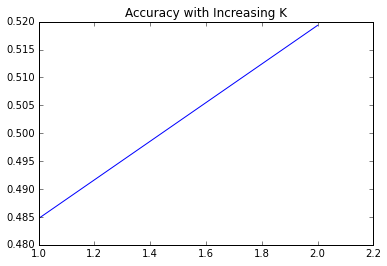

In [12]:
%matplotlib inline

results = []

for n in range(1, 3):
    clf = KNeighborsClassifier(n_neighbors=n)

    knn = clf.fit(X_pumps_train, y_pumps_train)
    preds = clf.predict(X_pumps_test)
    accuracy = np.where(preds==y_pumps_test, 1, 0).sum() / float(len(y_pumps_test))

    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])


results = pd.DataFrame(results, columns=["n", "accuracy"])

for_later = results

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

In [13]:
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)

y_pumps_train = y_pumps_train[['label']]
print y_pumps_train.head()

logreg = LogisticRegression()

logreg.fit(X_pumps_train, y_pumps_train)

a = logreg.predict(X_pumps_test)

# fit the model
result = logreg.score(X_pumps_test, y_pumps_test[['label']])

print 'Logistic Regression Score:',str(result)


                label
19254  non functional
1372   non functional
32855  non functional
29894  non functional
57114      functional
Logistic Regression Score: 0.628013468013


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.naive_bayes import GaussianNB

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train = y_pumps_train[['label']]
y_pumps_test = y_pumps_test['label']

gaussian = GaussianNB()
gaussian.fit(X_pumps_train, y_pumps_train)
result = gaussian.score(X_pumps_test, y_pumps_test)

a = gaussian.predict(X_pumps_test)
v = gaussian.predict_proba(X_pumps_test)

print 'Gaussian Regression Score:',str(result)

Gaussian Regression Score: 0.572457912458


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.svm import SVC

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train = y_pumps_train[['label']]
y_pumps_test = y_pumps_test[['label']]

svc = SVC()
svc.fit(X_pumps_train, y_pumps_train)
result = svc.score(X_pumps_test, y_pumps_test)

a = svc.predict(X_pumps_test)

# fit the model
#result = svc.score(X_pumps_test, y_pumps_test)

print 'SVC Regression Score:',str(result)

SVC Regression Score: 0.541548821549


//anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:472: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [16]:
from sklearn.tree import DecisionTreeClassifier

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=79)
y_pumps_train = y_pumps_train[['label']]
y_pumps_test = y_pumps_test[['label']]

dtc = DecisionTreeClassifier()
dtc.fit(X_pumps_train, y_pumps_train)
result = dtc.score(X_pumps_test, y_pumps_test)

a = dtc.predict(X_pumps_test)
print 'DTC Regression Score:',str(result)

DTC Regression Score: 0.733400673401


In [17]:
from sklearn.ensemble import RandomForestClassifier

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=16)
y_pumps_train = y_pumps_train[['label']]
y_pumps_test = y_pumps_test[['label']]
    
rfc = RandomForestClassifier()
rfc.fit(X_pumps_train, y_pumps_train)
result = rfc.score(X_pumps_test, y_pumps_test)

a = rfc.predict(X_pumps_test)

print X_pumps_train.head()
#print df_data.head()

print 'SVC Regression Score:',str(result)


          id  amount_tsh  gps_height  longitude  latitude  region_code  \
36693  47906           0        1577  34.490902 -1.291558           20   
8388   66621           0         945  36.885462 -3.526118            2   
37086  20290           0        1541  36.578002 -3.302132            2   
21167  50601           0        1233  38.419864 -4.675106            4   
10223  69741           0           0  32.928645 -9.290907           12   

       district_code  population  basin  scheme_management  \
36693              1         300      2                  2   
8388               7         230      3                  0   
37086              2         200      3                  0   
21167              1           1      3                  0   
10223              5           0      1                  0   

       extraction_type_class  management_group  payment  water_quality  \
36693                      3                 0        3              0   
8388                       0      

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [18]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv')
print test.head()

print test.shape

      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785           0    2013-02-04                    Dmdd        1996   
1  51630           0    2013-02-04  Government Of Tanzania        1569   
2  17168           0    2013-02-01                     NaN        1567   
3  45559           0    2013-01-22              Finn Water         267   
4  49871         500    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...          

In [19]:
a = test.basin.unique()
test.basin.replace(a,(1,2,3,4,5,6,7,8,9),inplace=True)

b = test.scheme_management.unique()
test.scheme_management.replace(b,range(len(b)),inplace=True)

c = test.extraction_type_class.unique()
test.extraction_type_class.replace(c,range(len(c)),inplace=True)

d = test.management_group.unique()
test.management_group.replace(d,range(len(d)),inplace=True)

e = test.payment.unique()
test.payment.replace(e,range(len(e)),inplace=True)

f = test.water_quality.unique()
test.water_quality.replace(f,range(len(f)),inplace=True)

g = test.quantity.unique()
test.quantity.replace(g,range(len(g)),inplace=True)

h = test.source.unique()
test.source.replace(h,range(len(h)),inplace=True)

i = test.source_class.unique()
test.source_class.replace(i,range(len(i)),inplace=True)

j = test.waterpoint_type.unique()
test.waterpoint_type.replace(j,range(len(j)),inplace=True)

print test.shape

(14850, 40)


In [20]:
test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code','population',\
                  'basin','scheme_management','extraction_type_class','management_group','payment','water_quality',\
                  'quantity','source','source_class','waterpoint_type']]

print test.shape

(14850, 18)


In [21]:
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=16)

print X_pumps_train.shape

(44550, 18)


In [22]:
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

In [23]:
test = test.sort(['id'])

print test.head()
print test.tail()
print ' - '
'''
X_pumps_test = X_pumps_test.sort[['id']]
print X_pumps_test.head()
print X_pumps_test.tail()
print ' - '
X_pumps_train = X_pumps_train.sort[['id']]
print X_pumps_train.head()
print X_pumps_train.tail()
print ' - '
y_pumps_test = y_pumps_test.sort[['id']]
print y_pumps_test.head()
print y_pumps_test.tail()
print ' - '
y_pumps_train = y_pumps_train.sort[['id']]
print y_pumps_train.head()
print y_pumps_train.tail()
'''

       id  amount_tsh  gps_height  longitude   latitude  region_code  \
3402   10           0         197  38.790694  -5.113207            4   
14136  13           0         803  36.905545 -10.765602           10   
5702   14           0        1804  36.570357  -3.251609            2   
11739  29           0           0  35.882325  -6.067613            1   
785    32           0           0  33.886334  -9.457260           12   

       district_code  population  basin  scheme_management  \
3402               3         250      2                  1   
14136              1           1      3                  1   
5702               2         200      2                  1   
11739              5           0      7                  1   
785                3           0      9                  1   

       extraction_type_class  management_group  payment  water_quality  \
3402                       1                 1        0              0   
14136                      2                 1

"\nX_pumps_test = X_pumps_test.sort[['id']]\nprint X_pumps_test.head()\nprint X_pumps_test.tail()\nprint ' - '\nX_pumps_train = X_pumps_train.sort[['id']]\nprint X_pumps_train.head()\nprint X_pumps_train.tail()\nprint ' - '\ny_pumps_test = y_pumps_test.sort[['id']]\nprint y_pumps_test.head()\nprint y_pumps_test.tail()\nprint ' - '\ny_pumps_train = y_pumps_train.sort[['id']]\nprint y_pumps_train.head()\nprint y_pumps_train.tail()\n"

In [24]:
print test.shape
print X_pumps_test.shape
print X_pumps_train.shape
print y_pumps_test.shape
print y_pumps_train.shape

(14850, 18)
(14850, 18)
(44550, 18)
(14850, 2)
(44550, 2)


In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_pumps_train, y_pumps_train_lbl)
result = rfc.score(X_pumps_test, y_pumps_test_lbl)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [26]:
pred = rfc.predict(test)

In [27]:
to_submit = []
print len(test)
for ind in range(len(test)):
    ids = test.id[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()

df_submit.to_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/submission_2.csv', sep=',', index=False)

print 'SVC Regression Score:',str(result)


14850
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
SVC Regression Score: 0.78303030303


In [ ]:
'''

a = df_data.basin.unique()
df_data.basin.replace(a,(1,2,3,4,5,6,7,8,9),inplace=True)

b = df_data.scheme_management.unique()
df_data.scheme_management.replace(b,range(len(b)),inplace=True)

c = df_data.extraction_type_class.unique()
df_data.extraction_type_class.replace(c,range(len(c)),inplace=True)

d = df_data.management_group.unique()
df_data.management_group.replace(d,range(len(d)),inplace=True)

e = df_data.payment.unique()
df_data.payment.replace(e,range(len(e)),inplace=True)

f = df_data.water_quality.unique()
df_data.water_quality.replace(f,range(len(f)),inplace=True)

g = df_data.quantity.unique()
df_data.quantity.replace(g,range(len(g)),inplace=True)

h = df_data.source.unique()
df_data.source.replace(h,range(len(h)),inplace=True)

i = df_data.source_class.unique()
df_data.source_class.replace(i,range(len(i)),inplace=True)

j = df_data.waterpoint_type.unique()
df_data.waterpoint_type.replace(j,range(len(j)),inplace=True)

print df_data.head()
print df_data.tail()

'''
